In [1]:
# Manage warnings due to inconsistency in Gensim's model objects
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # disable
warnings.filterwarnings('ignore', category=DeprecationWarning)  # disable
#warnings.filterwarnings('always')  # enable all

# Word2vec Study using MIMIC data

* Single thread, same number of notes
* Single thread, increasing number of notes
* Multiple threads, same number of notes
* Multiple threads, increasing number of notes

In [6]:
# 100 notes
training_file = '/home/edponce/Documents/utk/word2vec/data/text8'


In [7]:
# Set number of threads
threads = 1

## Run Gensim's word2vec implementation

* Gensim only requires that the input must provide sentences sequentially, when iterated over. No need to keep everything in RAM, so we can provide one sentence, process it, forget it, and load another sentence.
* Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed). Note that for a fully deterministically-reproducible run, you must also limit the model to a single worker thread (workers=1), to eliminate ordering jitter from OS thread scheduling. (In Python 3, reproducibility between interpreter launches also requires use of the PYTHONHASHSEED environment variable to control hash randomization).

In [10]:
import gensim
import time

seed = 10
#model = gensim.models.word2vec.Word2Vec(corpus_file=training_file, seed=seed, size=100, window=5, alpha=0.05, sample=0.001, min_count=5, iter=5, negative=0, sg=0, hs=1, sorted_vocab=1, workers=threads)
#model.train(corpus_file=training_file, total_words=model.corpus_total_words, epochs=model.epochs)


model = gensim.models.word2vec.Word2Vec(seed=seed, size=100, window=5, alpha=0.05, sample=0.001, min_count=5, iter=5, negative=0, sg=0, hs=1, sorted_vocab=1, workers=threads)
model.build_vocab(corpus_file=training_file)
model.train(corpus_file=training_file, total_words=model.corpus_total_words, epochs=model.epochs)

idx_offs = -1  # hack to match indices with original word2vec (</s>)

print('Total words: {}'.format(model.corpus_total_words))
print('Vocabulary size: {}'.format(len(model.wv.vocab)))

Total words: 17005207
Vocabulary size: 71290
Runtime: 34.113593101501465


## Run Gensim's FastText implementation

* 'word_ngrams' option - If 1, uses enriches word vectors with subword(n-grams) information. If 0, this is equivalent to Word2Vec. **No effect**

In [ ]:
import gensim

model = gensim.models.FastText(corpus_file=training_file, word_ngrams=0, seed=seed, size=100, window=5, alpha=0.05, sample=0.001, min_count=5, iter=5, negative=0, sg=0, hs=1, sorted_vocab=1, workers=threads)

print('Total words: {}'.format(model.corpus_total_words))
print('Vocabulary size: {}'.format(len(model.wv.vocab)))

## Load pre-trained word embeddings (original word2vec) 

* Embeddings can be in binary or text format (set flag accordingly)
* Word2vec sorts vocabulary and word embeddings based on word frequency in decreasing order

In [6]:
# 1 thread, 100 notes, cbow/hs
embedding_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_100.vec'
vocab_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_100.voc'
total_words=13703  # total words count from output file (used for print)
cluster_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_100.class'

In [ ]:
# 16 thread, 100 notes, cbow/hs
embedding_file = 'w2v_outputs/cbow_hs/outputs_16a/mimicnotes_100.vec'
vocab_file = 'w2v_outputs/cbow_hs/outputs_16a/mimicnotes_100.voc'
total_words=13703  # total words count from output file (used for print)
cluster_file = 'w2v_outputs/cbow_hs/outputs_16a/mimicnotes_100.class'

In [ ]:
# 32 thread, 100 notes, cbow/hs
embedding_file = 'w2v_outputs/cbow_hs/outputs_32a/mimicnotes_100.vec'
vocab_file = 'w2v_outputs/cbow_hs/outputs_32a/mimicnotes_100.voc'
total_words=13703  # total words count from output file (used for print)
cluster_file = 'w2v_outputs/cbow_hs/outputs_32a/mimicnotes_100.class'

In [ ]:
# 1 thread, 1K notes, cbow/hs
embedding_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_1K.vec'
vocab_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_1K.voc'
total_words=176124  # total words count from output file (used for print)
cluster_file = 'w2v_outputs/cbow_hs/outputs_1a/mimicnotes_1K.class'

In [7]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)
idx_offs = 0  # hack to match Gensim word indices (</s>)

print('Total words: {}'.format(total_words))
print('Vocabulary size: {}'.format(len(model.wv.vocab)))

Total words: 13703
Vocabulary size: 364


In [8]:
# Load word frequencies from file because Gensim does not do it
with open(vocab_file) as fd:
    for line in fd:
        data = line.split()
        model.wv.vocab[data[0]].count = int(data[1])

### Vocabulary

* Frequencies are available if vocabulary produced by Gensim's word2vec. If loaded from original word2vec the frequency is actually the word index.

In [9]:
# Print sorted vocabulary because Gensim's word2vec uses an unordered dictionary
for word, vocab_obj in sorted(model.wv.vocab.items(), reverse=True, key=lambda item: (item[1], item[0])):
    print('{:6} {:20} {:8}'.format(vocab_obj.index+abs(idx_offs), word, vocab_obj.count))

     0 </s>                     2295
     1 to                        303
     2 the                       258
     3 /                         253
     4 with                      235
     5 and                       191
     6 xxhosp                    190
     7 Home                      182
     8 Insurance                 153
     9 Primary                   152
    10 at                        152
    11 is                        149
    12 of                        146
    13 for                       138
    14 Care                      133
    15 will                      130
    16 in                        130
    17 patient                   127
    18 a                         124
    19 No                        120
    20 Patient                   119
    21 xxln                      113
    22 insurance:                112
    23 application:              112
    24 I                         108
    25 xxname                    104
    26 -                         103
 

In [17]:
# If vocabulary is sorted, simply print
for word, vocab_obj in model.wv.vocab.items():
    print('{:6} {:20} {:8}'.format(vocab_obj.index+abs(idx_offs), word, vocab_obj.count))

     0 </s>                     2295
     1 to                        303
     2 the                       258
     3 /                         253
     4 with                      235
     5 and                       191
     6 xxhosp                    190
     7 Home                      182
     8 Insurance                 153
     9 Primary                   152
    10 at                        152
    11 is                        149
    12 of                        146
    13 for                       138
    14 Care                      133
    15 will                      130
    16 in                        130
    17 patient                   127
    18 a                         124
    19 No                        120
    20 Patient                   119
    21 xxln                      113
    22 insurance:                112
    23 application:              112
    24 I                         108
    25 xxname                    104
    26 -                         103
 

### Query word vectors

In [10]:
print(model.wv['patient'])

[ 0.118038 -0.306393  0.07968  -0.538108  0.112142  0.0255   -0.222896
  0.030596 -0.281341  0.532687  0.046894  0.297377 -0.326664 -0.138665
 -0.025232  0.49082   0.246943  0.339542 -0.085772  0.615748 -0.075028
 -0.193479 -0.233604  0.031726  0.144065 -0.22484  -0.273526  0.307527
 -0.165977  0.134173  0.476133 -0.146502 -0.390621  0.164253 -0.348991
 -0.137321  0.507209  0.340349 -0.134464 -0.312328 -0.027906  0.03371
 -0.424975  0.115944  0.099212  0.043119 -0.007857  0.428121  0.043234
 -0.115256 -0.069871 -0.273112  0.069525  0.410361 -0.154146  0.15789
  0.138675 -0.06549  -0.065455  0.104672 -0.054646  0.019242 -0.466723
  0.082675 -0.180272  0.091074 -0.073664 -0.006274  0.37607   0.188961
  0.099469 -0.12978   0.105259 -0.132447  0.118465  0.249861 -0.409332
  0.081628  0.210151 -0.479089 -0.058777  0.06015   0.079476 -0.165464
  0.146029  0.414626 -0.021688  0.050469  0.495849 -0.07513   0.099534
  0.134805 -0.131853 -0.311077  0.098793  0.5792    0.319445 -0.076609
 -0.0786

### Find word pair similarity

In [ ]:
model.wv.similarity('patient', 'ICU')

In [ ]:
similarities = model.wv.cosine_similarities(model.wv['hospital'], model.wv.vectors)
print(similarities)

# ICU: index 125 for 100 notes
# Phone: index 125 for 1K notes
print('Similarity with \'{}\': {}'.format(model.wv.index2word[125+idx_offs], similarities[125+idx_offs]))

### N-gram similarities

In [ ]:
model.wv.n_similarity(['Discharge', 'plan'], ['rehab', 'care'])

### Find most similar words (cosine similarity)

* Finds similar words, similarity $= cos\left(\theta\right) = \dfrac{v_1 \cdot v_2}{||v_1||\ ||v_2||}$
* Generates same results as word2vec "distance" program

In [12]:
model.wv.similar_by_word('patient', topn=15)

[('ICU', 0.9361271858215332),
 ('home.', 0.9273184537887573),
 ('and', 0.9256189465522766),
 ('plan', 0.9132742881774902),
 ('on', 0.9131805300712585),
 ('by', 0.9059147834777832),
 ('her', 0.9035663604736328),
 ('he', 0.9031703472137451),
 ('see', 0.897368311882019),
 ('the', 0.8944529294967651),
 ('an', 0.8903933763504028),
 ('not', 0.8836799263954163),
 ('ambulance', 0.8770198225975037),
 ('Liaison', 0.875587522983551),
 ('is', 0.8734579682350159)]

### Similarity matrix and distribution

In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [6]:
def similarity_matrix_plot(data, labels):
    dim = len(labels)
    dim_stride =  int(dim/20)  # show 20 equidistant word labels
    fig, ax = plt.subplots(figsize=(8,8))
    cax = ax.matshow(data, interpolation='nearest')
    plt.xticks(range(0, dim, dim_stride), labels[slice(0, dim, dim_stride)], rotation=90);
    plt.yticks(range(0, dim, dim_stride), labels[slice(0, dim, dim_stride)]);
    fig.colorbar(cax, ticks=[x * 0.1 for x in range(-10, 11)])
    plt.show()

In [7]:
similarity_matrix = np.array(gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model.wv.vectors.T)))

# Check that values comply with range [-1,1]
similarity_matrix[similarity_matrix > 1.0] = 1.0
similarity_matrix[similarity_matrix < -1.0] = -1.0

labels = list(model.wv.vocab.keys())

<IPython.core.display.Javascript object>


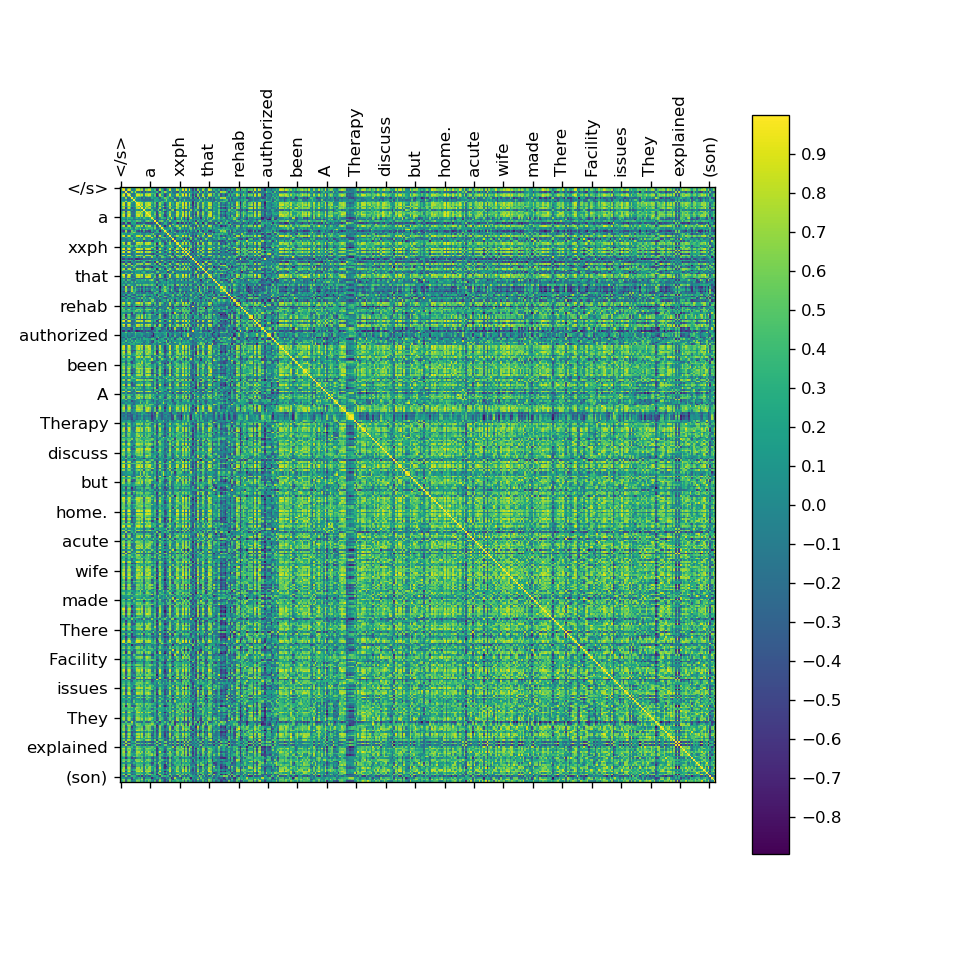

<IPython.core.display.Javascript object>


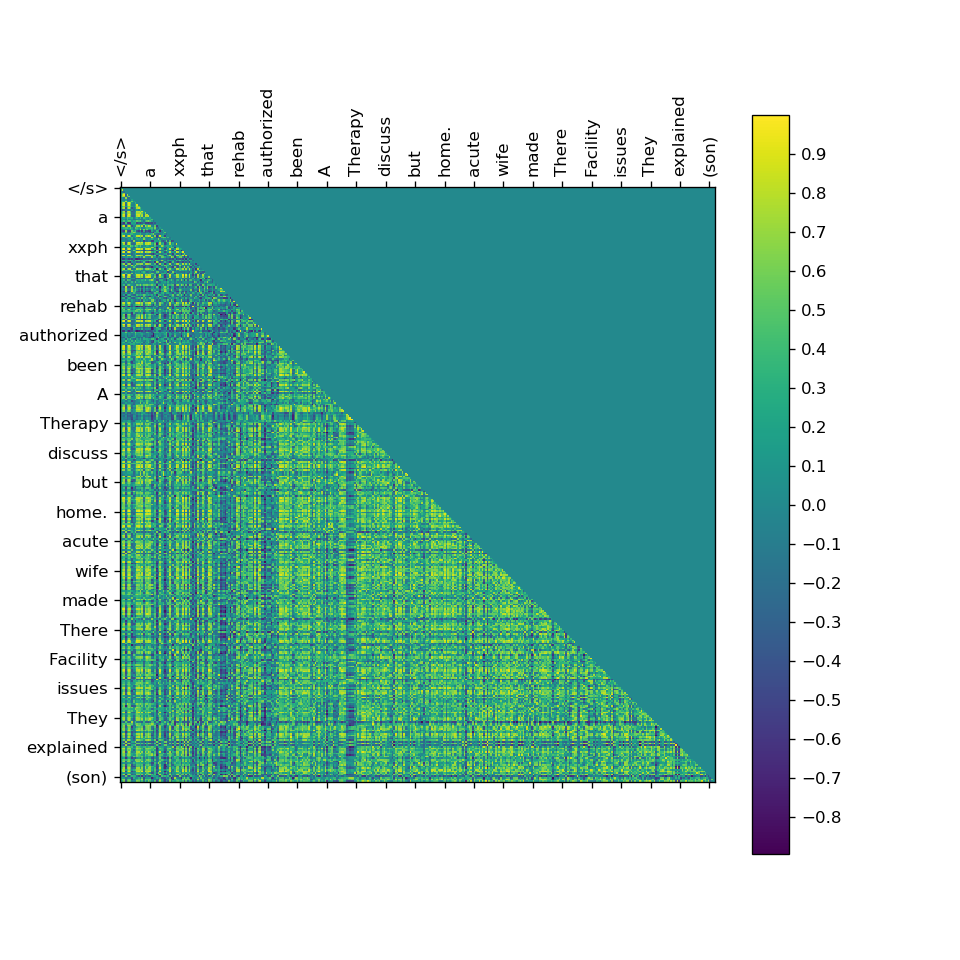

In [8]:
similarity_matrix_plot(similarity_matrix, labels)

# Lower triangular similarity matrix
# Zeroes main diagonal and upper triangular
similarity_matrix_tril = np.tril(similarity_matrix, k=-1)
similarity_matrix_plot(similarity_matrix_tril, labels)

In [25]:
def flatten_tri(data, side='L'):
    '''Flatten in row-order the triangular side of a 2D Numpy array'''
    data_tri = []
    if side == 'L':
        for row in range(data.shape[0]):
            for col in range(row):
                data_tri.append(data[row][col])
    else:
        for row in range(data.shape[0]):
            for col in range(row+1, data.shape[1]):
                data_tri.append(data[row][col])

    return np.array(data_tri)

In [26]:
def cosine_similarity_distribution_plot(data):
    bins = int(np.sqrt(len(data) / 2))  # bins = sqrt(n / 2)
    plt.figure()
    plt.hist(data, bins=bins)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.show()

<IPython.core.display.Javascript object>


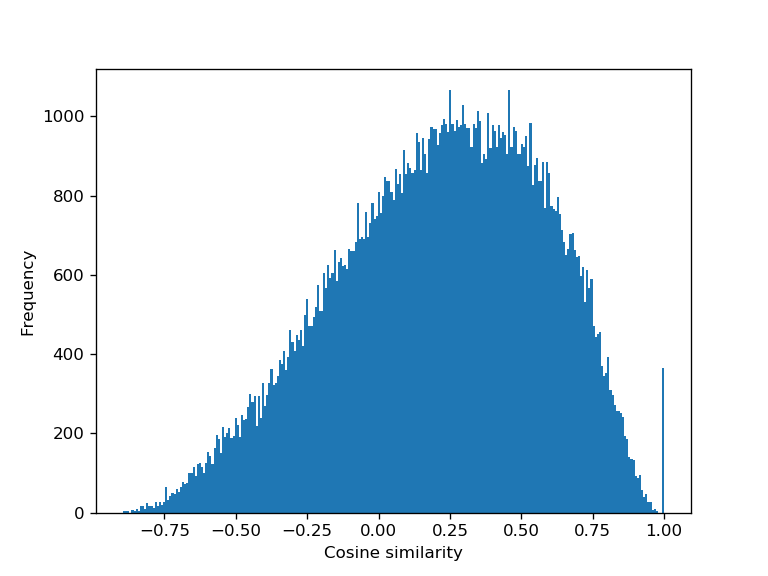

<IPython.core.display.Javascript object>


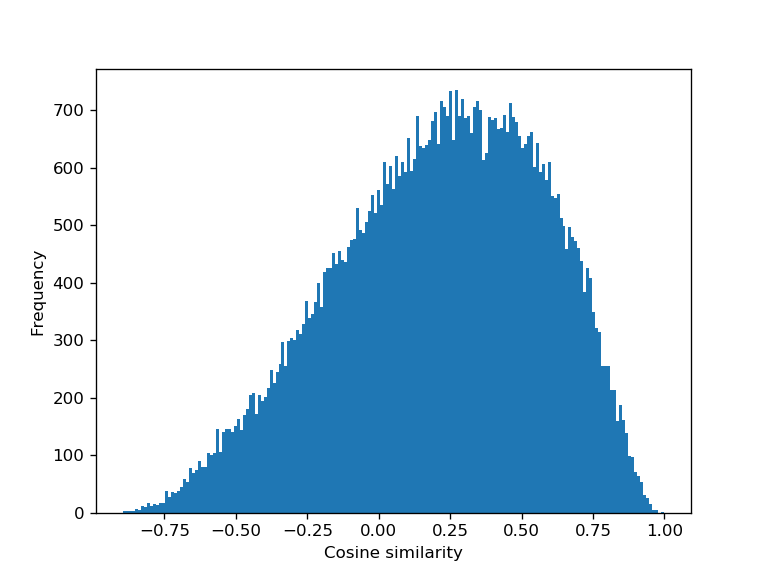

In [27]:
# Convert data into 1D array before plotting
cosine_similarity_distribution_plot(similarity_matrix.ravel())

# Use triangular matrix only
cosine_similarity_distribution_plot(flatten_tri(similarity_matrix))

### Calculate cosine distances

* The term cosine distance is often used for the complement in positive space
* Cosine distance $= 1 - $ similarity $= 1 - \dfrac{v_1 \cdot v_2}{||v_1||\ ||v_2||}$
* Between word-pairs
* Find word-pairs with closer distances

In [ ]:
cos_dist = 1 - model.wv.similarity('patient', 'ICU')
print(cos_dist)

In [ ]:
for widx, dist in enumerate(model.wv.distances('patient')):
    print('{:6} {:20} {}'.format(widx+abs(idx_offs), model.wv.index2word[widx], dist))

In [ ]:
for w in model.wv.words_closer_than('patient', 'home'):
    print('{:20} {}'.format(w, model.wv.distance('patient', w)))

### Cosine distance and angle distributions

* Cosine distance $= 1 - $ similarity $= 1 - \dfrac{v_1 \cdot v_2}{||v_1||\ ||v_2||}$
* Angle between vectors, $\theta = arccos\left(\dfrac{v_1 \cdot v_2}{||v_1||\ ||v_2||}\right)$

In [9]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
def flatten_tri(data, side='L'):
    '''Flatten in row-order the triangular side of a 2D Numpy array'''
    data_tri = []
    if side == 'L':
        for row in range(data.shape[0]):
            for col in range(row):
                data_tri.append(data[row][col])
    else:
        for row in range(data.shape[0]):
            for col in range(row+1, data.shape[1]):
                data_tri.append(data[row][col])

    return np.array(data_tri)

In [11]:
def cosine_distance_distribution_plot(data):
    bins = int(np.sqrt(len(data) / 2))  # bins = sqrt(n / 2)
    plt.figure()
    plt.hist(data, bins=bins)
    plt.xlabel('Cosine distance')
    plt.ylabel('Frequency')
    plt.show()

In [12]:
similarity_matrix = np.array(gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model.wv.vectors.T)))

# Check that values comply with range [-1,1]
similarity_matrix[similarity_matrix > 1.0] = 1.0
similarity_matrix[similarity_matrix < -1.0] = -1.0

<IPython.core.display.Javascript object>


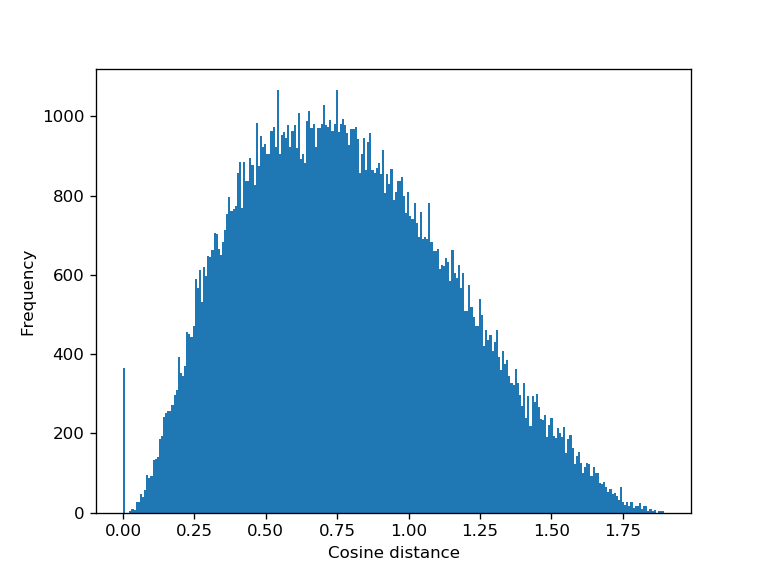

<IPython.core.display.Javascript object>


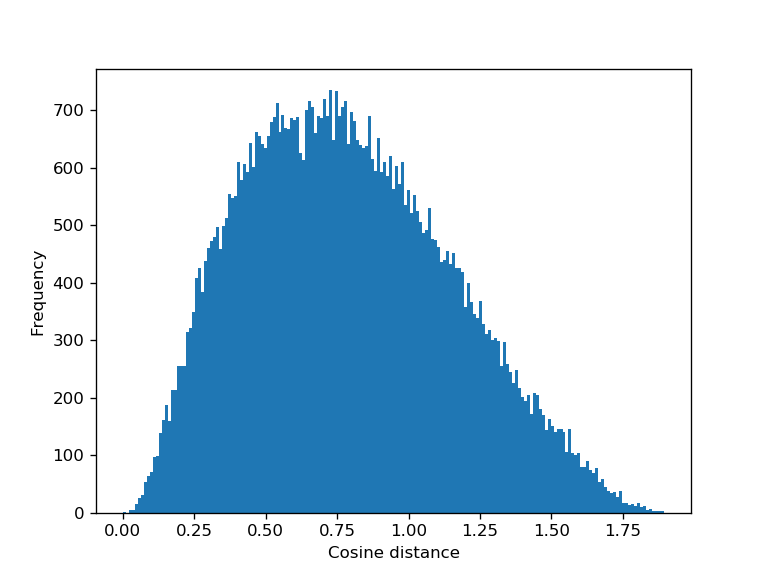

In [14]:
distance_matrix = 1 - similarity_matrix

# Convert data into 1D array before plotting
cosine_distance_distribution_plot(distance_matrix.ravel())

# Use triangular matrix only
cosine_distance_distribution_plot(flatten_tri(distance_matrix))

In [15]:
def angle_distribution_plot(data):
    bins = int(np.sqrt(len(data) / 2))  # bins = sqrt(n / 2)
    plt.figure()
    plt.hist(data, bins=bins)
    plt.xlabel('Angle')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
similarity_matrix = np.array(gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model.wv.vectors.T)))

# Check that values comply with range [-1,1]
similarity_matrix[similarity_matrix > 1.0] = 1.0
similarity_matrix[similarity_matrix < -1.0] = -1.0

<IPython.core.display.Javascript object>


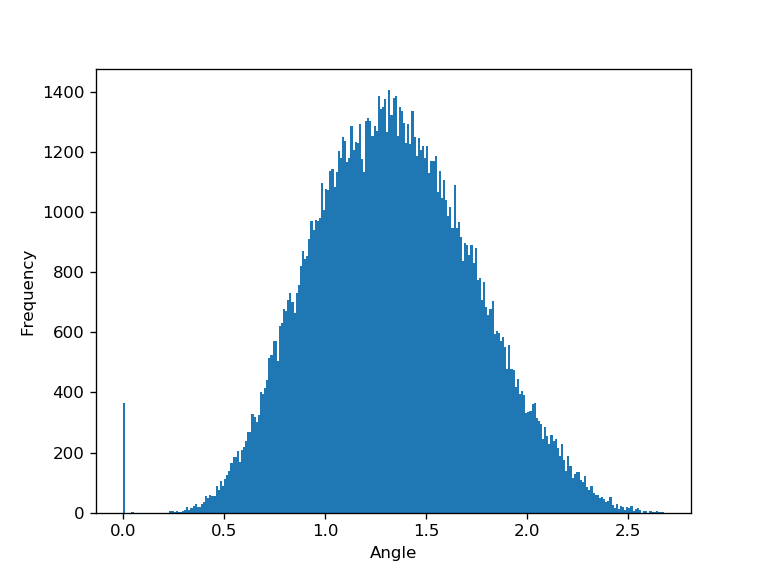

<IPython.core.display.Javascript object>


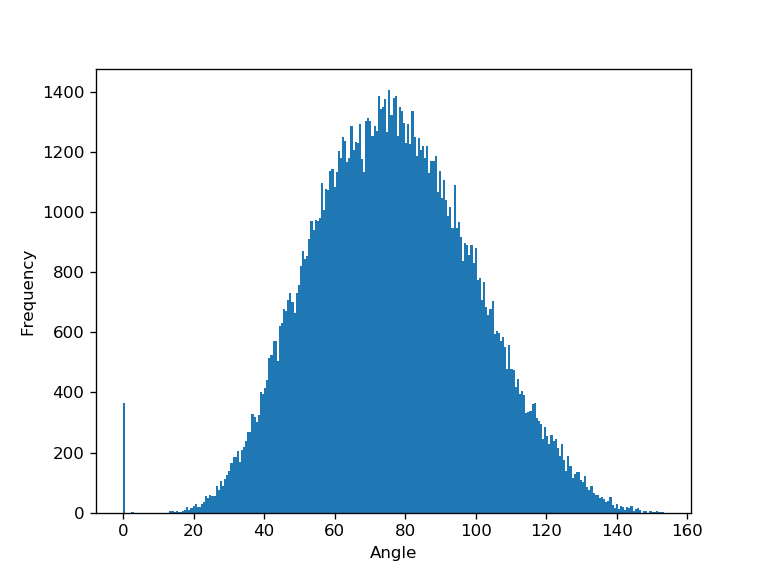

In [17]:
angle_matrix = np.arccos(similarity_matrix)

# Convert data into 1D array before plotting
# Plot angles in radians and degrees
angle_distribution_plot(angle_matrix.ravel())
angle_distribution_plot((180/np.pi) * angle_matrix.ravel())

<IPython.core.display.Javascript object>


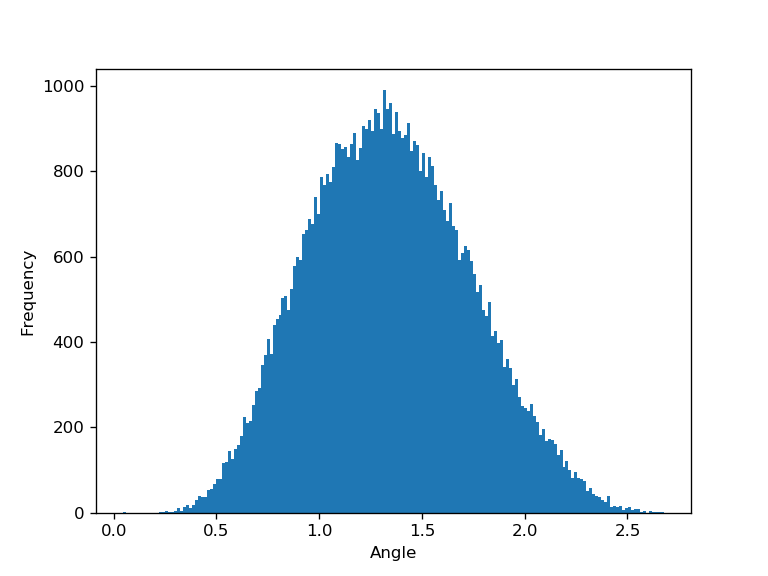

<IPython.core.display.Javascript object>


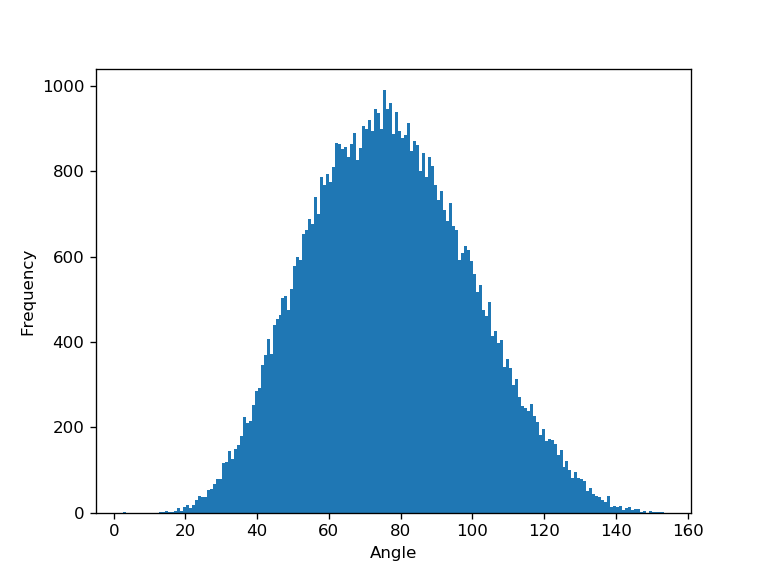

In [18]:
angle_matrix = np.arccos(similarity_matrix)

# Use triangular matrix only
# Convert data into 1D array before plotting
# Plot angles in radians and degrees
angle_distribution_plot(flatten_tri(angle_matrix))
angle_distribution_plot((180/np.pi) * flatten_tri(angle_matrix))

### Cosine similarity/distance and angle boxplots

In [28]:
def box_plot(data, labels):
    plt.figure()
    plt.boxplot(data, sym='.', labels=labels)
    plt.show()

<IPython.core.display.Javascript object>


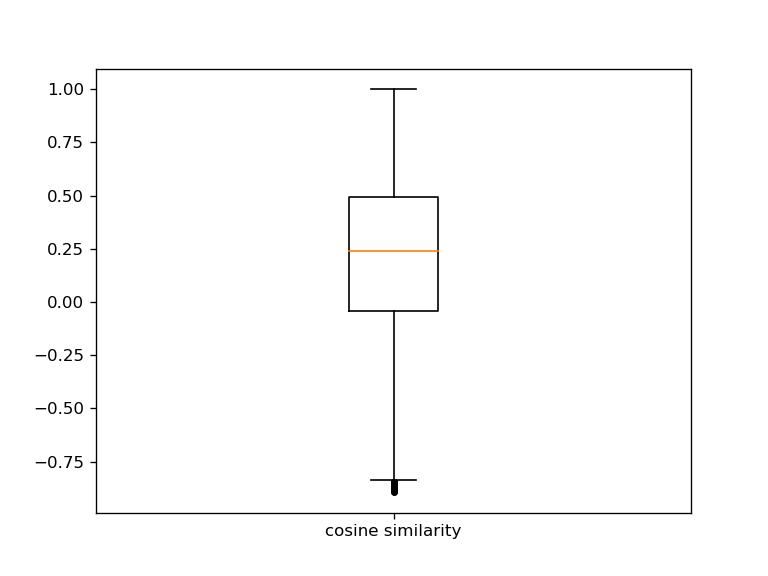

<IPython.core.display.Javascript object>


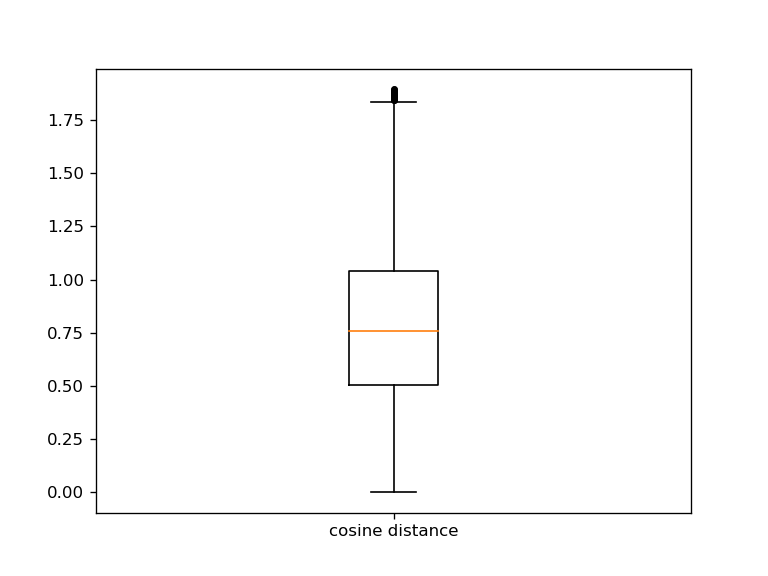

<IPython.core.display.Javascript object>


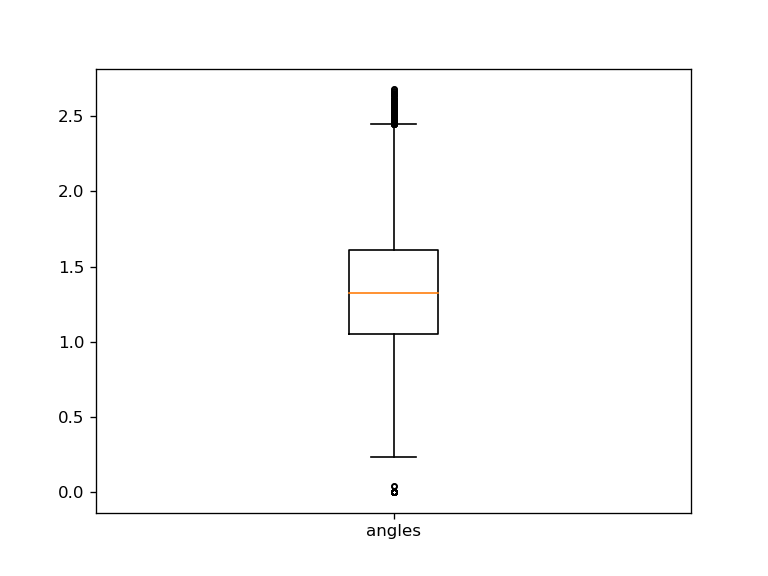

<IPython.core.display.Javascript object>


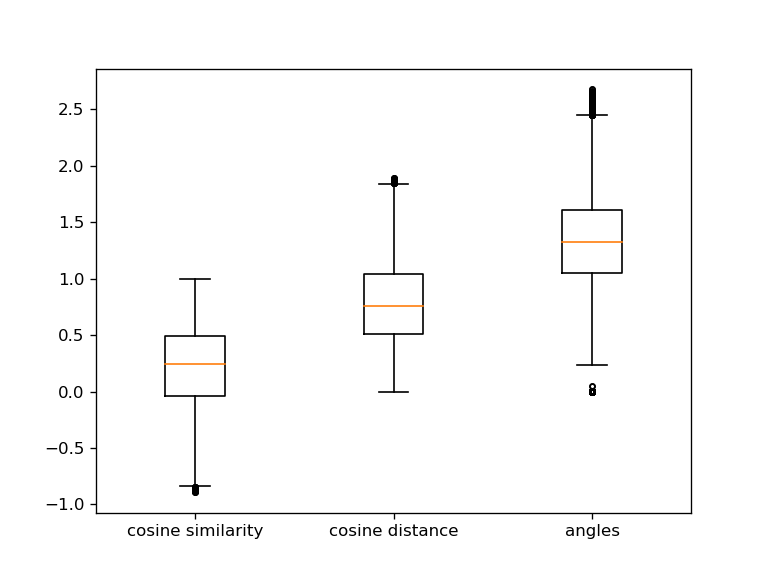

In [31]:
# Convert data into 1D array before plotting
box_plot(similarity_matrix.ravel(), ['cosine similarity'])
box_plot(distance_matrix.ravel(), ['cosine distance'])
box_plot(angle_matrix.ravel(), ['angles'])
box_plot([similarity_matrix.ravel(), distance_matrix.ravel(), angle_matrix.ravel()], ['cosine similarity', 'cosine distance', 'angles'])

In [ ]:
# Use triangular matrix only
# Convert data into 1D array before plotting
box_plot(flatten_tri(angle_matrix), ['angles'])
box_plot(flatten_tri(distance_matrix), ['cosine distance'])
box_plot([flatten_tri(distance_matrix), flatten_tri(angle_matrix)], ['cosine distance', 'angles'])

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

* Technique for dimensionality reduction, useful for visualizing highly-dimensional data
* t-SNE always produces a 2D separation, in contrast to PCA which can produce many different components
* t-SNE is a non-parametric learning algorithm. The embedding is learned by directly moving the data across the low dimensional space. That means one does not get an eigenvector to use in new data. In contrast, using PCA the eigenvectors offer a new basis for projecting new data.
* t-SNE is non-deterministic, does not guarantees to get exactly the same output each time it is run (though the results are likely to be similar)

In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
def tsne_similarity_plot(data):
    # Scatter plot
    x_coords = data[:,0]
    y_coords = data[:,1]
    plt.figure()
    plt.scatter(x_coords, y_coords, s=10)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')

    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

<IPython.core.display.Javascript object>


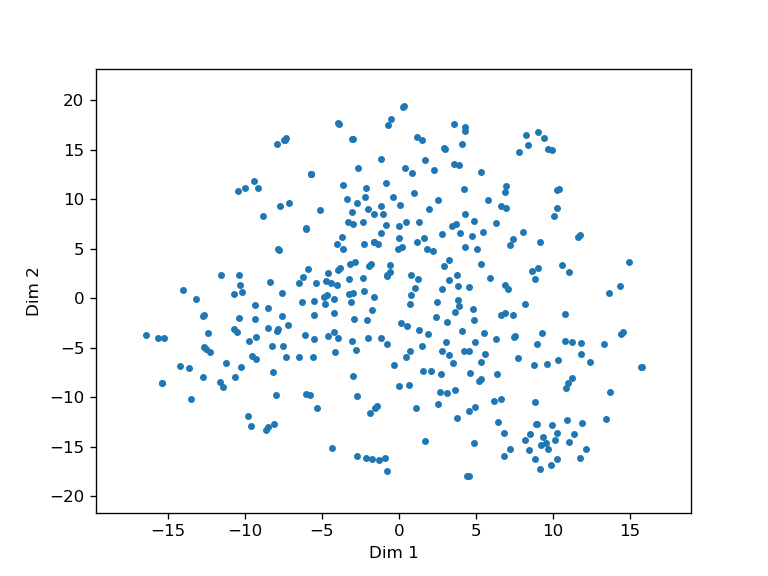

In [7]:
# Calculate t-SNE for 2D
tsne_model = TSNE(n_components=2, random_state=0)
tsne = tsne_model.fit_transform(model.wv.vectors)

tsne_similarity_plot(tsne)

### PCA (Principal Component Analysis)

* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space
* PCA always finds the k best linear combination in terms of variance

In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
def pca_similarity_plot(data):
    # Calculate PCA for 2D
    pca = PCA(n_components=2, random_state=0)
    Y = pca.fit_transform(data)

    # Scatter plot
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    plt.figure()
    plt.scatter(x_coords, y_coords, s=10)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

In [ ]:
pca_similarity_plot(model.wv.vectors)

### K-means clustering analysis

* Find number of clusters to use via 'elbow', 'silhouette', and 'gap statistic' approaches


#### Elbow analysis

* For each cluster number, calculate the total within-cluster sum of square (wss)

* Plot the curve of wss according to the number of clusters

* The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters


#### Silhouette analysis

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
* The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters.


* For each cluster number, calculate the average silhouette of observations (avg.sil)

* Plot the curve of avg.sil according to the number of clusters

* The location of the maximum is considered as the appropriate number of clusters


#### Gap statistic analysis

* http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
#kiter = [10]
kiter = list(range(2,41))
avg_silhouette_scores = []
kmeans_scores = []
for k in kiter:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(model.wv.vectors)
    kmeans_scores.append(kmeans.inertia_)
    avg_silhouette_scores.append(metrics.silhouette_score(model.wv.vectors, kmeans.labels_, metric='euclidean'))

In [ ]:
# Plot k-means scores
plt.figure()
plt.plot(kiter, kmeans_scores)
plt.xlabel('Number of clusters')
plt.ylabel('K-means score')
plt.show()

# Plot average silhouette scores
plt.figure()
plt.plot(kiter, avg_silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
avg_silhouette_score = metrics.silhouette_score(model.wv.vectors, kmeans.labels_, metric='euclidean')
print('Average silhouette_score for {} clusters: {}'.format(num_clusters, avg_silhouette_score))

# Compute the silhouette scores for each sample
sample_silhouette_scores = metrics.silhouette_samples(model.wv.vectors, kmeans.labels_)
for i, w in enumerate(model.wv.vocab):
    print('{:20} {}'.format(w, sample_silhouette_scores[i]))

### PCA and t-SNE analysis (with k-means on raw data)

* Get labels and centroids of clusters
* Score = opposite value of embedding matrix on the k-means objective which is sum of sample distances to closest cluster centroid
* Inertia = sum of squared error distances for clusters

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE

In [ ]:
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(model.wv.vectors)

In [ ]:
# For comparison, overwrite cluster labels with cluster produced by k-means in original word2vec
labels = []
with open(cluster_file) as fd:
    for line in fd:
        data = line.split()
        labels.append(int(data[1]))
kmeans.labels_ = np.array(labels)

In [ ]:
print('Cluster labels')
print(kmeans.labels_)  # size of vocabulary

#print ('Cluster centroids')
#print(kmeans.cluster_centers_)  # dim = number of clusters x embedding dim

print('Score: {}'.format(kmeans.score(model.wv.vectors)))
print('Inertia: {}'.format(kmeans.inertia_))

In [ ]:
def tsne_kmeans_plot(data, kmeans, labels=[], topn=1, num_components=2):
    # Calculate t-SNE for 2D/3D
    tsne = TSNE(n_components=num_components, random_state=0)
    Y = tsne.fit_transform(data[:topn])

    # Scatter plot
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    fig = plt.figure()
    if num_components == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(x_coords, y_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.colorbar(scatter)

        if labels:
            for label, x, y in zip(labels, x_coords, y_coords):
                plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
    else:
        z_coords = Y[:,2]
        ax = Axes3D(fig)
        scatter = ax.scatter(x_coords, y_coords, z_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        ax.set_zlabel('Dim 3')
        plt.colorbar(scatter)

    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

In [ ]:
# Plot subset of data points
tsne_kmeans_plot(model.wv.vectors, kmeans, labels=model.wv.vocab, topn=200)
tsne_kmeans_plot(model.wv.vectors, kmeans, topn=200, num_components=3)

# Plot all data points
tsne_kmeans_plot(model.wv.vectors, kmeans, topn=len(model.wv.vocab), num_components=3)

In [ ]:
def pca_kmeans_plot(data, kmeans, labels=[], topn=1, num_components=2):
    # Calculate PCA for 2D/3D
    pca = PCA(n_components=num_components, random_state=0)
    Y = pca.fit_transform(data[:topn])
    
    # Scatter plot
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    fig = plt.figure()
    if num_components == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(x_coords, y_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.colorbar(scatter)

        if labels:
            for label, x, y in zip(labels, x_coords, y_coords):
                plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
    else:
        z_coords = Y[:,2]
        ax = Axes3D(fig)
        scatter = ax.scatter(x_coords, y_coords, z_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.colorbar(scatter)
        
    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

In [ ]:
# Plot subset of data points
pca_kmeans_plot(model.wv.vectors, kmeans, labels=model.wv.vocab, topn=200)
pca_kmeans_plot(model.wv.vectors, kmeans, topn=200, num_components=3)

# Plot all data points
pca_kmeans_plot(model.wv.vectors, kmeans, topn=len(model.wv.vocab), num_components=3)

### PCA analysis (with k-means on PCA data)

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [9]:
# Calculate PCA for 2D/3D
pca = PCA(n_components=3, random_state=0)
pca_model = pca.fit_transform(model.wv.vectors)

In [10]:
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pca_model)
print(pca_model.shape[1])

3


In [11]:
def pca_kmeans_plot2(data, kmeans, labels=[], topn=1):
    # Scatter plot
    x_coords = data[:,0]
    y_coords = data[:,1]
   
    fig = plt.figure()
    if data.shape[1] == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(x_coords, y_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.colorbar(scatter)

        if labels:
            for label, x, y in zip(labels, x_coords, y_coords):
                plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
    
    # 3D plot, see https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    else:
        z_coords = data[:,2]
        ax = Axes3D(fig)
        scatter = ax.scatter(x_coords, y_coords, z_coords, c=kmeans.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.colorbar(scatter)
        
    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

<IPython.core.display.Javascript object>


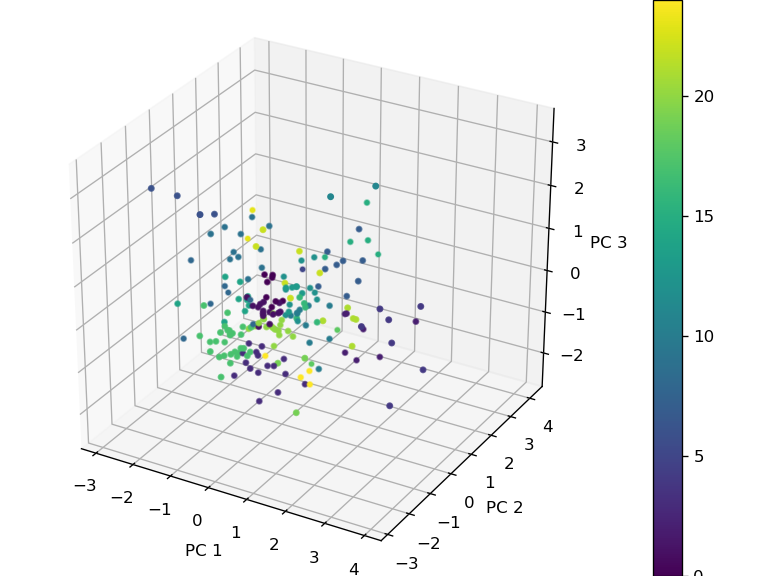

<IPython.core.display.Javascript object>


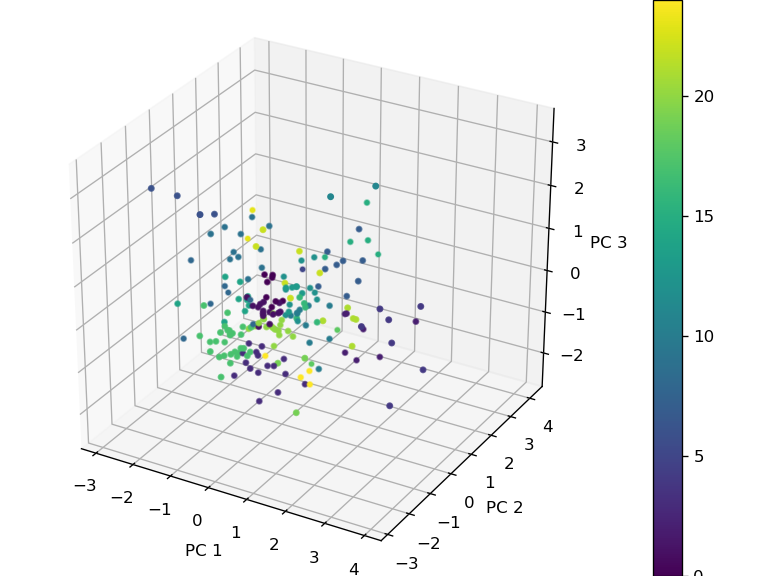

<IPython.core.display.Javascript object>


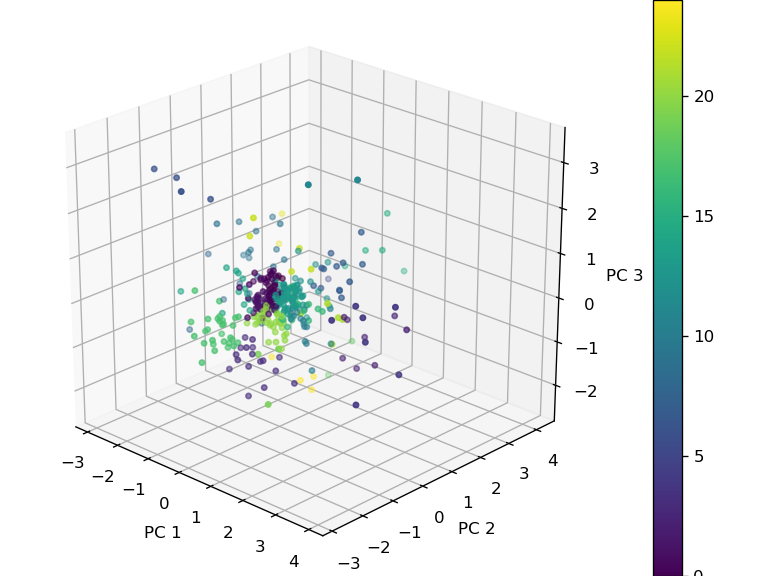

In [12]:
# Plot subset of data points
pca_kmeans_plot2(pca_model[:200], kmeans, labels=model.wv.vocab, topn=200)
pca_kmeans_plot2(pca_model[:200], kmeans, topn=200)

# Plot all data points
pca_kmeans_plot2(pca_model, kmeans, topn=len(model.wv.vocab))

### PCA analysis (with minimum spanning tree (MST) clustering on raw data)

In [13]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import os
import sys
module_path = os.path.abspath(os.path.join('code'))
if not module_path in sys.path:
    sys.path.append(module_path)
from mst_clustering import MSTClustering

In [14]:
def pca_mst_plot(data, cluster, labels=[], topn=1):
    # Scatter plot
    x_coords = data[:,0]
    y_coords = data[:,1]
   
    fig = plt.figure()
    if data.shape[1] == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(x_coords, y_coords, c=cluster.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.colorbar(scatter)

        if labels:
            for label, x, y in zip(labels, x_coords, y_coords):
                plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
    
    # 3D plot, see https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    else:
        z_coords = data[:,2]
        ax = Axes3D(fig)
        scatter = ax.scatter(x_coords, y_coords, z_coords, c=cluster.labels_[:topn], s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.colorbar(scatter)
        
    xlim_offs = (abs(x_coords.min()) + abs(x_coords.max())) / 10
    ylim_offs = (abs(y_coords.min()) + abs(y_coords.max())) / 10
    plt.xlim(x_coords.min()-xlim_offs, x_coords.max()+xlim_offs)
    plt.ylim(y_coords.min()-ylim_offs, y_coords.max()+ylim_offs)
    plt.show()

In [15]:
# Calculate PCA for 2D/3D
pca = PCA(n_components=3, random_state=0)
pca_model = pca.fit_transform(model.wv.vectors)

In [16]:
# MST clustering, requires cutoff_scale
# [0-1] - fraction
# [2-:] - value
mst = MSTClustering(cutoff_scale=2)
mst_model = mst.fit(model.wv.vectors)
mst_model.labels_[1]

0

<IPython.core.display.Javascript object>


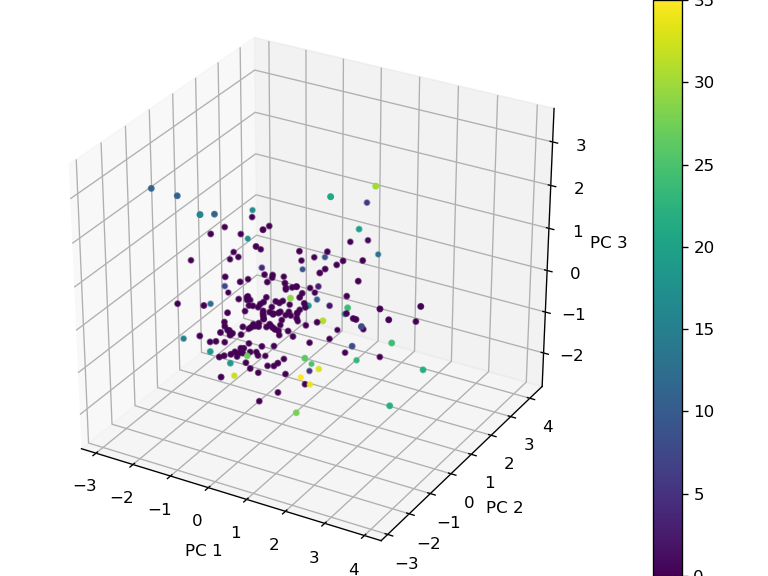

<IPython.core.display.Javascript object>


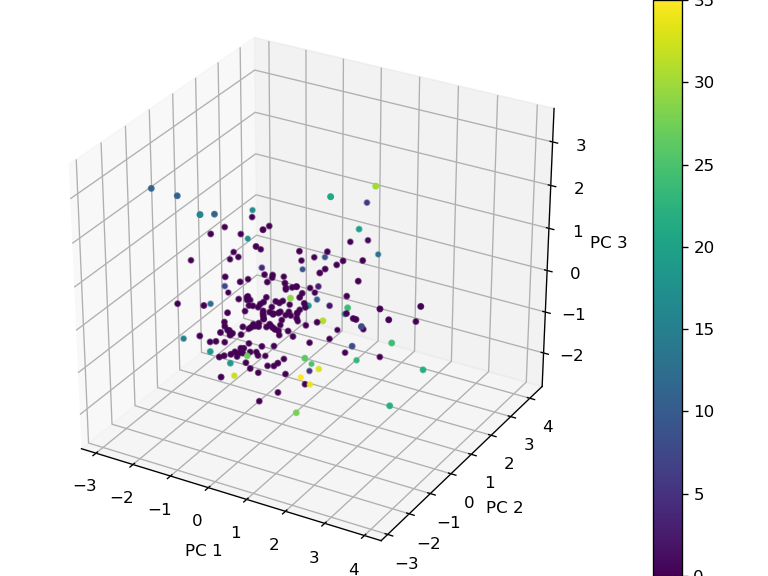

<IPython.core.display.Javascript object>


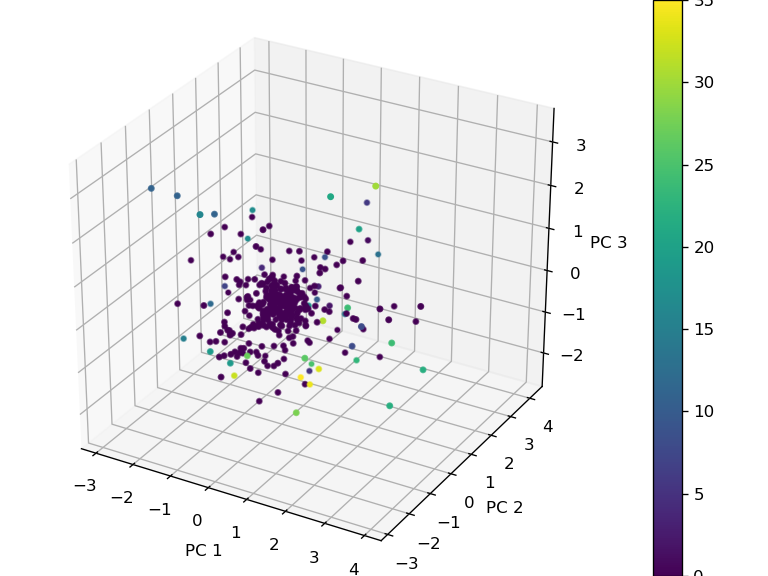

In [73]:
# Plot subset of data points
pca_mst_plot(pca_model[:200], mst_labels, labels=model.wv.vocab, topn=200)
pca_mst_plot(pca_model[:200], mst_labels, topn=200)

# Plot all data points
pca_mst_plot(pca_model, mst_labels, topn=len(model.wv.vocab))

### Angles between vector triplets

In [32]:
import numpy as np

In [34]:
# Take two numpy vectors of the same length and return their cosine similarity.
def cosineSim(vec1,vec2):
    if len(vec1) != len(vec2):
        print('Cannot compute cosine similarity between vectors of mismatched length.')
        return -2
    else:
        dotprod = np.dot(vec1,vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)
        if norm1 == 0 or norm2 == 0:
            print('Cosine similarity: Cannot compare vectors with 0 length.')
            return 0
        cossim = dotprod / (norm1 * norm2)
        return cossim

# Determine angle defined by three points.
def threePointAngle(vec1,vec2,vec3):
    return np.arccos(cosineSim(vec1 - vec2, vec3 - vec2))

In [ ]:
def angle_distribution_plot(data):
    bins = int(np.sqrt(len(data) / 2))  # bins = sqrt(n / 2)
    plt.figure()
    plt.hist(data, bins=bins)
    plt.xlabel('Angle')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# O(n^3) complexity, so choose subset of vector triplets
#num_vectors = len(model.wv.vectors)
num_vectors = 60

angles_3vectors = []
for x in range(num_vectors - 2):
    for y in range(x + 1, num_vectors - 1):
        for z in range(y + 1, num_vectors):
            angles_3vectors.append(threePointAngle(model.wv.vectors[x], model.wv.vectors[y], model.wv.vectors[z]))

print('Number of angles: {}'.format(len(angles_3vectors)))

In [ ]:
angles_3vectors = np.array(angles_3vectors)

# Plot angles in radians and degrees
angle_distribution_plot(angles_3vectors)
angle_distribution_plot((180/np.pi) * angles_3vectors)

In [ ]:
box_plot(angles_3vectors, ['3V angles'])

### ANOVA

In [ ]:
from scipy import stats

In [ ]:
F, p = stats.f_oneway(angles_3vectors)
F
p

### ggplot

* https://nipunbatra.github.io/blog/2017/50-ggplot-python-1.html

In [ ]:
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
plt.style.use('ggplot') 
import seaborn as sns

In [ ]:
# Plot the Data to see the distributions/relationships
cols = model.wv.vocab
df = pd.DataFrame(model.wv.vectors, columns=cols)
sns.pairplot(model.wv.vectors, x_vars=cols, y_vars=cols)